<a href="https://colab.research.google.com/github/SBilaal/Cards/blob/master/Grain_Eating_Birds_Classification%20-%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = '/content/gdrive/MyDrive/Birds_Test_Dataset'
train_path = f'{data}/train'
valid_path = f'{data}/valid'
test_path = f'{data}/test'
classes = ['AFRICAN FIREFINCH', 'CROWNED PIGEON', 'GREEN JAY', 'MOURNING DOVE', 'NICOBAR PIGEON', 'PURPLE FINCH', 'RED BROWED FINCH', 'ROCK DOVE', 'STRAWBERRY FINCH', 'YELLOW HEADED BLACKBIRD']
print(train_path)

os.path.isdir(train_path)
os.path.isdir(test_path)
os.path.isdir(valid_path)

/content/gdrive/MyDrive/Birds_Test_Dataset/train


True

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(directory=train_path, target_size=(299,299), classes=classes, batch_size=8)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(directory=valid_path, target_size=(299,299), classes=classes, batch_size=8)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(directory=test_path, target_size=(299,299), classes=classes, batch_size=8, shuffle=False)

Found 950 images belonging to 10 classes.
Found 230 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
imgs, labels = next(train_batches)

In [29]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
plotImages(imgs)
print(labels)

In [5]:
xception = tf.keras.applications.xception.Xception(include_top=False)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
xception.summary()

In [22]:
input = keras.Input(shape=(299,299,3))
x = xception(input, training=False)
x = GlobalAveragePooling2D()(x)
output = Dense(units=10, activation='softmax')(x)

In [23]:
model = Model(inputs=input, outputs=output)

In [24]:
xception.trainable = False

In [25]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20490     
Total params: 20,881,970
Trainable params: 20,490
Non-trainable params: 20,861,480
_________________________________________________________________


In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
119/119 - 399s - loss: 2.1156 - accuracy: 0.3179 - val_loss: 1.8763 - val_accuracy: 0.7391
Epoch 2/10
119/119 - 387s - loss: 1.6704 - accuracy: 0.7779 - val_loss: 1.5049 - val_accuracy: 0.8696
Epoch 3/10
119/119 - 387s - loss: 1.3374 - accuracy: 0.8958 - val_loss: 1.2307 - val_accuracy: 0.8957
Epoch 4/10
119/119 - 387s - loss: 1.0896 - accuracy: 0.9316 - val_loss: 1.0267 - val_accuracy: 0.9174
Epoch 5/10
119/119 - 386s - loss: 0.9073 - accuracy: 0.9463 - val_loss: 0.8757 - val_accuracy: 0.9217
Epoch 6/10
119/119 - 389s - loss: 0.7700 - accuracy: 0.9568 - val_loss: 0.7611 - val_accuracy: 0.9261
Epoch 7/10
119/119 - 388s - loss: 0.6654 - accuracy: 0.9579 - val_loss: 0.6722 - val_accuracy: 0.9217
Epoch 8/10
119/119 - 383s - loss: 0.5837 - accuracy: 0.9621 - val_loss: 0.6031 - val_accuracy: 0.9217
Epoch 9/10
119/119 - 381s - loss: 0.5186 - accuracy: 0.9621 - val_loss: 0.5465 - val_accuracy: 0.9174
Epoch 10/10
119/119 - 381s - loss: 0.4670 - accuracy: 0.9621 - val_loss: 0.4988 - 

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

In [31]:
predictions = model.predict(x=test_batches, verbose=2)

7/7 - 17s


In [ ]:
np.round(predictions)

In [33]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [34]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-72)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
print(test_batches.class_indices)
print(classes)

Normalized confusion matrix
[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0.  0.  0.  0.2 0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.2 0.  0.  0.  0.  0.  0.  0.  0.2 0.6]]


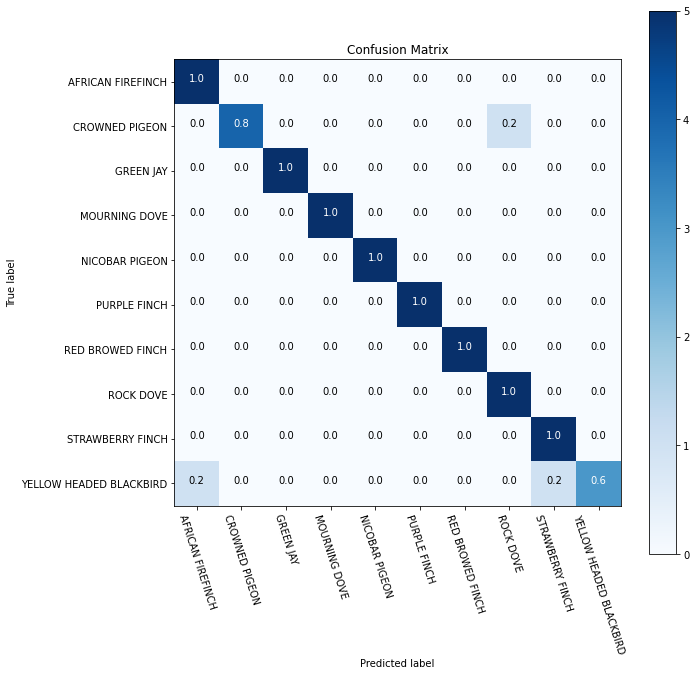

In [35]:
cm_plot_labels = classes
plot_confusion_matrix(cm=cm, classes=classes, normalize=True, title='Confusion Matrix')